In [18]:
import pickle
import pandas
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from shutil import copyfile


apartmentlist = range(3,5)
Jasondir = "jason/"
classnamelist = []
models3d = []
collection_models = {}

BadClassName = ['waterglass', 'photoframe', 'facecream','clothesshirt','clothespants','clothespile',
                'folder','orchid','hairproduct','magazine','vase','paper','rug','curtains','deodorant','perfume',
                'wallpictureframe', 'lightswitch', 'wallphone', 'powersocket', 'toiletpaper', 'knifeblock','kitchentable','closet',
                'box','coffeetable','cabinet','wallshelf','closetdrawer','kitchencabinet','bed','desk','tvstand','hanger']

allcollection_classname = list()
allcollection_3dmodels = list()
for apartmentid in apartmentlist:
    f = open("filtered_stimulus_2/apartment_" + str(apartmentid) + "_good.txt", "r")
    for x in f:
        infor = pickle.load( open( (Jasondir + x).rstrip('.png\n') + '.pkl', "rb" ) )
        #print(infor)
        targetclassname = infor['target_node']['class_name']
        targetprefab = infor['target_node']['prefab_name']
        if targetclassname in BadClassName:
            continue
        
        if targetprefab in models3d:
            continue       
        
        models3d.append(targetprefab)        
        classnamelist.append(targetclassname)
    
    allcollection_classname.append(classnamelist)
    allcollection_3dmodels.append(models3d)
 
result1 = set(allcollection_classname[0])
for s in allcollection_classname[1:]:
    result1.intersection_update(s)
print(len(result1))

result1 = set(allcollection_3dmodels[0])
for s in allcollection_3dmodels[1:]:
    result1.intersection_update(s)
print(len(result1))

        
classnamelist_counts = Counter(classnamelist)
common = classnamelist_counts.most_common()
for item in common:
    collection_models[item[0]] = []
 
counter = 0
for item in models3d:
    if item not in collection_models[classnamelist[counter]]:
        collection_models[classnamelist[counter]].append(item)        
    counter = counter + 1
    
print(collection_models.keys())
print(len(collection_models))

# nbars = len(collection_models)
# number = []
# labels = []

# for item in collection_models.keys():
#     number.append(len(collection_models[item]))
#     labels.append(item)

#print(number)
#print(len(labels))

62
94
dict_keys(['dishbowl', 'pillow', 'book', 'cellphone', 'plate', 'cutleryknife', 'nightstand', 'cupcake', 'condimentshaker', 'condimentbottle', 'chair', 'toaster', 'mug', 'bananas', 'cookingpot', 'keyboard', 'cutleryfork', 'fryingpan', 'toothbrush', 'mincedmeat', 'boardgame', 'longboard', 'apple', 'milkshake', 'cutlets', 'breadslice', 'wineglass', 'stove', 'slippers', 'radio', 'peach', 'washingsponge', 'plum', 'chocolatesyrup', 'mousemat', 'cereal', 'toy', 'mouse', 'game', 'bench', 'pie', 'sofa', 'oventray', 'lime', 'remotecontrol', 'candle', 'tv', 'pudding', 'coffeepot', 'toothpaste', 'computer', 'cpuscreen', 'barsoap', 'dishwashingliquid', 'microwave', 'sink', 'chinesefood', 'globe', 'poundcake', 'coffeemaker', 'printer', 'painkillers'])
62


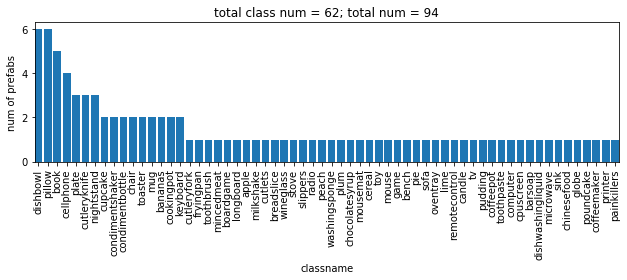

In [15]:
#plot histogram
plt.title('total class num = ' + str(nbars) + "; total num = " + str(sum(number)), fontsize=12)
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.xticks(np.arange(nbars), labels, rotation='vertical')
plt.xlabel('classname')
plt.ylabel('num of prefabs')

N = nbars
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.1 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.tight_layout()

plt.savefig("plot/hist_3dprefab" + ".eps", format='eps')
plt.show()

In [7]:
#take only first 3d model
counter = 0
collection_filtered = {}
for item in collection_models.keys():     
    target3dmodel = collection_models[item][0]
    collection_filtered[item] = []

for item in collection_models.keys():    
    target3dmodel = collection_models[item][0]
    
    for apartmentid in apartmentlist:
        f = open("filtered_stimulus/apartment_" + str(apartmentid) + "_good.txt", "r")
        for x in f:
            infor = pickle.load( open( (Jasondir + x).rstrip('.png\n') + '.pkl', "rb" ) )
            #print(infor)
            targetclassname = infor['target_node']['class_name']
            targetprefab = infor['target_node']['prefab_name']
            
            if targetprefab != target3dmodel:
                continue

            collection_filtered[item].append((x).rstrip('.png\n'))
            break
  
#for plotting
nbars = len(collection_filtered)
number = []
labels = []

for item in collection_filtered.keys():
    number.append(len(collection_filtered[item]))
    labels.append(item)
    
#plot histogram
plt.title('total class num = ' + str(nbars) + "; total num = " + str(sum(number)), fontsize=12)
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.xticks(np.arange(nbars), labels, rotation='vertical')
plt.xlabel('classname')
plt.ylabel('num of apartmenets per prefab')

N = nbars
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.1 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.tight_layout()

plt.savefig("plot/hist_numApt_prefab" + ".eps", format='eps')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'jason/apartment_3/img_73_prefab_kitchen_cabinet_all_modified_cam_1.pkl'

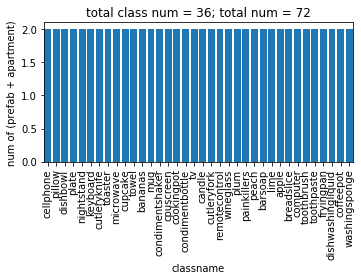

In [4]:
threshold = 2 #each 3d object model appears exactly twice out of 7 apartments
collection_final = {}
for item in collection_filtered.keys():
    if len(collection_filtered[item]) < threshold:
        continue
    
    collection_final[item] = collection_filtered[item][0:threshold]
    
#print(collection_final)

#for plotting
nbars = len(collection_final)
number = []
labels = []

for item in collection_final.keys():
    number.append(len(collection_final[item]))
    labels.append(item)
    
#plot histogram
plt.title('total class num = ' + str(nbars) + "; total num = " + str(sum(number)), fontsize=12)
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.xticks(np.arange(nbars), labels, rotation='vertical')
plt.xlabel('classname')
plt.ylabel('num of (prefab + apartment)')

N = nbars
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.1 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.tight_layout()

plt.savefig("plot/hist_prefab_apt" + ".eps", format='eps')
plt.show()


In [5]:
# copy good files and rename them as numbers
SrcImageFolder = 'stimulus/'
DestImageFolder = 'selected_clean_normal/'
counter = 0
for item in collection_final.keys():
    for i in range(threshold):
        src = SrcImageFolder + collection_final[item][i] + '.png'
        dst = DestImageFolder + 'normal_' + str(counter) + '.png'
        copyfile(src, dst)
        counter = counter + 1

In [7]:
with open("classes_65.txt", "w") as f:
    for key in collection_models.keys():
        print(key, file=f)

In [2]:
from scipy import io
import numpy as np

rawDir = '/home/mengmi/Projects/Proj_context3/VirtualHome/matlab/raw/'
Input = io.loadmat(rawDir + 'ItemToRoom.mat')  
ItemToRoom = Input['ItemToRoom']; 
wantedClass = Input['wantedClass']
a = []
for i in wantedClass:
    a.append(i.rstrip())
wantedClass = a

#!!! remove bathtub
#ItemToRoom = np.delete(ItemToRoom, 34, 0)
print(ItemToRoom)
print(wantedClass)
Input = io.loadmat(rawDir + 'SurfaceToRoom.mat')  
SurfaceToRoom = Input['SurfaceToRoom']; 
SurfaceList = Input['SurfaceList']; 
a = []
for i in SurfaceList:
    a.append(i.rstrip())
SurfaceList = a
print(SurfaceToRoom)
print(SurfaceList)

RoomList = ['kitchen', 'livingroom', 'bedroom', 'bathroom']

wanted = {'wantedClass': wantedClass,           
          'RoomList': RoomList,
          #'SurfaceList': SurfaceList, 
          #'collection_models': collection_models,
         'ItemToRoom': ItemToRoom.tolist(),
         'SurfaceToRoom': SurfaceToRoom.tolist(),
         'SurfaceList': SurfaceList}


import pickle

f = open("wanted.pkl","wb")
pickle.dump(wanted,f)
f.close()

wanted = pickle.load( open( "wanted.pkl", "rb" ) ) 
    

[[1 1 1 1]
 [0 1 1 0]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 1 1]
 [0 1 1 0]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 0 0]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 1 0]
 [1 1 1 1]
 [1 1 0 0]
 [0 1 1 0]
 [1 1 1 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 1]
 [1 1 0 0]
 [1 1 0 0]
 [0 1 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 1 0 0]
 [1 0 0 0]
 [1 1 1 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 0 0]
 [0 1 1 0]
 [0 1 1 0]
 [1 1 1 0]
 [0 1 1 0]
 [0 1 1 0]]
['cellphone', 'pillow', 'book', 'dishbowl', 'plate', 'keyboard', 'cutleryknife', 'toaster', 'microwave', 'radio', 'slippers', 'cupcake', 'towel', 'mug', 'condimentshaker', 'cpuscreen', 'mouse', 'cookingpot', 'condimentbottle', 'tv', 'candle', 'cutleryfork', 'remotecontrol', 'wineglass', 'plum', 'peach', 'barsoap', 'lime', 'apple', 'computer', 'toothbrush', 'toothpaste', 'fryingpan', 'dishwashingliquid', 'poundcake', 'washingsponge', 'milkshake', 'coffeemaker', 'pie',

In [1]:
import pickle
import numpy as np

wanted = pickle.load( open( "wanted.pkl", "rb" ) )
SurfaceToRoom = np.array(wanted['SurfaceToRoom'])
ItemToRoom = np.array(wanted['ItemToRoom'])
#wantedItem = wanted['wantedItem']
RoomList = wanted['RoomList']
#collection_models = wanted['collection_models']
wantedClass = wanted['wantedClass']
SurfaceList = wanted['SurfaceList']
wantedClass.pop()
print(len(wantedClass))
print(wantedClass)

48
['cellphone', 'pillow', 'book', 'dishbowl', 'plate', 'keyboard', 'cutleryknife', 'toaster', 'microwave', 'radio', 'slippers', 'cupcake', 'towel', 'mug', 'condimentshaker', 'cpuscreen', 'mouse', 'cookingpot', 'condimentbottle', 'tv', 'candle', 'cutleryfork', 'remotecontrol', 'wineglass', 'plum', 'peach', 'barsoap', 'lime', 'apple', 'computer', 'toothbrush', 'toothpaste', 'fryingpan', 'dishwashingliquid', 'poundcake', 'washingsponge', 'milkshake', 'coffeemaker', 'pie', 'chocolatesyrup', 'cereal', 'pudding', 'cutlets', 'globe', 'printer', 'chinesefood', 'boardgame', 'game']


In [5]:
targetclass = wantedClass[0]
print(targetclass)
destRooms = []
print(np.where(ItemToRoom[wantedClass.index(targetclass)] == 1))
for i  in np.where(ItemToRoom[wantedClass.index(targetclass)] == 1)[0]:
    destRooms.append(RoomList[i])


destSurface = []
for dstR in destRooms:
    for i in np.where( SurfaceToRoom[:, RoomList.index(dstR)] == 1)[0]:
        destSurface.append(SurfaceList[i])

destSurface = set(destSurface)
destSurface = list(destSurface)
print(destSurface)    

cellphone
(array([0, 1, 2, 3]),)
['stove', 'dishwasher', 'coffeetable', 'bookshelf', 'washingmachine', 'bathroomcounter', 'nightstand', 'desk', 'tvstand', 'kitchencounter', 'kitchentable', 'bench']


In [1]:
from scipy import io
import numpy as np

rawDir = '/home/mengmi/Projects/Proj_context3/VirtualHome/matlab/raw/'
Input = io.loadmat(rawDir + 'ItemToRoom_anomaly.mat')  
ItemToRoom = Input['ItemToRoom']; 
wantedClass = Input['wantedClass']
a = []
for i in wantedClass:
    a.append(i.rstrip())
wantedClass = a

#!!! remove bathtub
#ItemToRoom = np.delete(ItemToRoom, 34, 0)
print(ItemToRoom)
print(wantedClass)

SurfaceList = Input['SurfaceList']; 
a = []
for i in SurfaceList:
    a.append(i.rstrip())
SurfaceList = a
print(SurfaceList)

RoomList = ['kitchen', 'livingroom', 'bedroom', 'bathroom']

wanted = {'wantedClass': wantedClass,           
          'RoomList': RoomList,
          #'SurfaceList': SurfaceList, 
          #'collection_models': collection_models,
         'ItemToRoom': ItemToRoom.tolist(),         
         'SurfaceList': SurfaceList}


import pickle

f = open("wanted_anomaly.pkl","wb")
pickle.dump(wanted,f)
f.close()

wanted = pickle.load( open( "wanted_anomaly.pkl", "rb" ) ) 

[[0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1